# Подготовка к ЛР №3
## Курс "Системы очувствления роботов"
-----

Необходимо продемонстрировать недостатки использования линеаризации в случае преобразования из полярных координат в декартовые.

### Исходные данные 

Дано равномерное распределение в полярной системе координат
<img src="https://likerobotics.ru/images/polar_sintetic_data.jpg" width="300"/>

1.) Найти значение средней и дисперсию исходного распределения <br />
2.) Выполнить преобразовнаие в ортогональную систему координат
\begin{align}
x = rcos\mathbf{\theta}
\end{align}
\begin{align}
y = rsin\mathbf{\theta}
\end{align}
3.) Найти значение средней и дисперсию полученного распределения

## Программный код

In [1]:
import numpy as np
from numpy.linalg import inv, cholesky
import matplotlib.pyplot as plt

In [5]:
data[0]

array([1.00390673, 1.33471565])

In [3]:
#генерируем равномерное распределение
n = 600
xy_min = [0.99, 1.2] # minimum 
xy_max = [1.01, 1.9] # maxumum
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
# print(data)
#среднее
means = data.mean(axis=0)
means

array([0.99987481, 1.54971184])

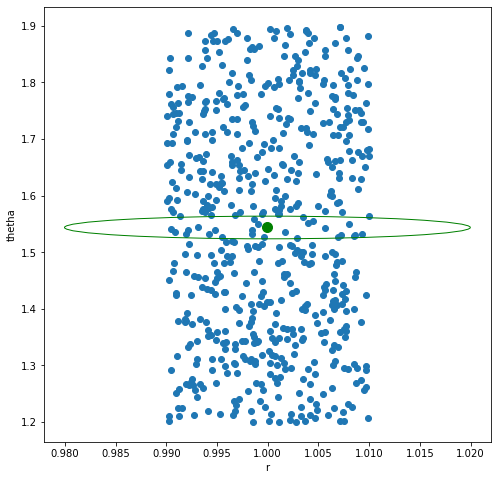

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:,0], data[:,1])
plt.scatter(means[0], means[1], color='green', s=100)
circle1 = plt.Circle((means[0], means[1]), 0.02, color='g', fill=False)
plt.gca().add_patch(circle1)
plt.xlabel('r')
plt.ylabel('thetha')
plt.show()

In [8]:
# разработаем вспомогательную функцию, которая выполняет преобразование из полярных координат в декартовые
vals = data[0]
print(vals)

def make_transform(vals):
    """
    example inputs:
    vals = [1.52191247 1.00751719]
    """
    r = vals[0]
    theta = vals[1]
    
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return [x, y]

make_transform(vals)

[1.00826274 1.63051845]


[-0.06017980325403631, 1.006465172657052]

In [9]:
new_data = np.zeros((len(data), 2))
new_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [10]:
for i, vals in enumerate(data):
    new_vals = make_transform(vals)
    new_data[i] = new_vals
# print(new_data)
new_means = new_data.mean(axis=0)

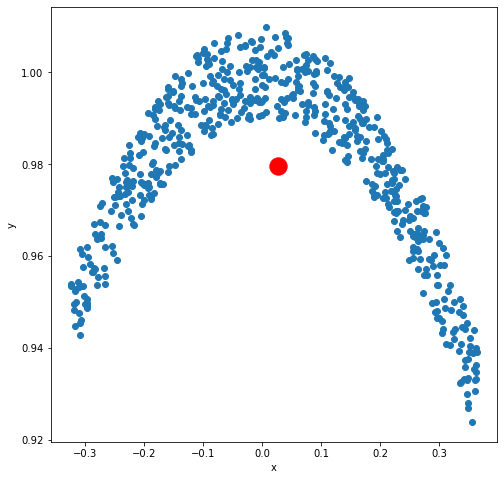

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(new_data[:,0], new_data[:,1])
plt.scatter(new_means[0], new_means[1], color='red', s=300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
new_means

array([0.02649546, 0.97964927])

Чтобы выполнить линеаризацию, необходимо взять производную от модели измерения.
\begin{align}
x = \mathbf{\bar{r}}cos\mathbf{\bar{\theta}} + \mathbf{cos{\bar{\theta}}(r-\bar{r})} - \mathbf{\bar{r}sin\bar{\theta}(\theta - \bar{\theta})}
\end{align}
\begin{align}
y = \mathbf{\bar{r}sin\bar{\theta} + sin\bar{\theta}(r-\bar{r}) + \bar{r}cos\bar{\theta}(\theta - \bar{\theta})}
\end{align}
И получаем

In [14]:
r_bar = means[0]
theta_bar = means[1]
print("r_bar={}, theta_bar={}".format(r_bar, theta_bar) )

r_bar=0.9999690199587125, theta_bar=1.5437483986094087


In [17]:
#linearized case
vals = data[0]
print(vals)

def make_transform_linear(r_bar, theta_bar, vals):
    """
    example input:
    0.9999690199587125, 1.5437483986094087, [1.00826274 1.63051845]
    """
#     r_bar = 0
#     theta_bar = 0
    r = vals[0]
    theta = vals[1]
    # motion model 
    x = r_bar * np.cos(theta_bar) + np.cos(theta_bar) * (r - r_bar) - r_bar * np.sin(theta_bar) * (theta - theta_bar)
    y = r_bar * np.sin(theta_bar) + np.sin(theta_bar) * (r - r_bar) + r_bar * np.cos(theta_bar) * (theta - theta_bar)
    return [x, y]

make_transform_linear(r_bar, theta_bar, vals)

[1.00826274 1.63051845]


[-0.05946753382623928, 1.0102405358982374]

In [18]:
lin_data = np.zeros((len(data), 2))
for i, vals in enumerate(data):
    new_vals = make_transform_linear(r_bar, theta_bar, vals)
    lin_data[i] = new_vals

lin_means = lin_data.mean(axis=0)

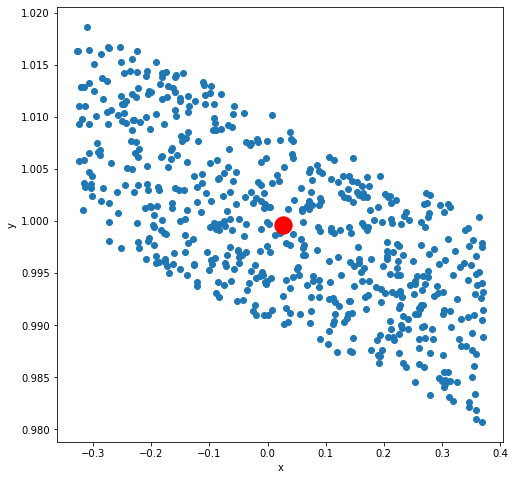

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(lin_data[:,0], lin_data[:,1])
plt.scatter(lin_means[0], lin_means[1], color='red', s=300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
lin_means

array([0.02704379, 0.99960326])

In [23]:
new_means

array([0.02649546, 0.97964927])

# Теперь по сигма точкам

Для равномерного распределения
$$
\sigma^2 = \frac{1}{12}(b-a)^{2}
$$

In [24]:
#среднее входного распределения
x_0 = np.array([[0.99972105],[1.55724888]])
#ковариация входного распределения
rmin, rmax = data[:,0].min(), data[:,0].max()
tmin, tmax = data[:,1].min(), data[:,1].max()
sigma1 = (rmax-rmin)**2 * 1/12
sigma2 = (tmax-tmin)**2 * 1/12
P_0 = np.array([[sigma1, 0],
                [0, sigma2]]) #ковариация в моментв ремени 0

In [25]:
P_0

array([[3.32083922e-05, 0.00000000e+00],
       [0.00000000e+00, 4.06317144e-02]])

In [ ]:
#разложение Холецкого для ковариационной матрицы
N = 2 # размерность распределения
ka = 3 - N # каппа, значение для нормального распределения
hol = cholesky(P_0) 
hol

array([[0.00576267, 0.        ],
       [0.        , 0.2015731 ]])

In [27]:
#сигма точки нужно найти
sigma_list = []
sigma_list.append(x_0)
for i in range(0, N):
    singma = x_0 + np.array(np.sqrt(N + ka) * hol[i,:]).reshape(2,1)
    sigma_list.append(singma)
for i in range(0, N):
    singma = x_0 - np.array(np.sqrt(N + ka) * hol[i,:]).reshape(2,1)
    sigma_list.append(singma)
print(sigma_list)

[array([[0.99972105],
       [1.55724888]]), array([[1.00970229],
       [1.55724888]]), array([[0.99972105],
       [1.90638373]]), array([[0.98973981],
       [1.55724888]]), array([[0.99972105],
       [1.20811403]])]


In [28]:
# разработаем вспомогательную функцию, которая выполняет преобразование из полярных координат в декартовые
vals = data[0]
def make_transform2(vals):
    r = float(vals[0])
    theta = float(vals[1])
    
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return [x, y]
make_transform2(vals)

[-0.06017980325403631, 1.006465172657052]

In [29]:
sigma_transformed = np.zeros((len(sigma_list), 2))
for i, sigma in enumerate(sigma_list):
    print(sigma)
    news_sigma = make_transform2(sigma)
    sigma_transformed[i] = news_sigma
sigma_transformed

[[0.99972105]
 [1.55724888]]
[[1.00970229]
 [1.55724888]]
[[0.99972105]
 [1.90638373]]
[[0.98973981]
 [1.55724888]]
[[0.99972105]
 [1.20811403]]


array([[ 0.01354325,  0.99962931],
       [ 0.01367847,  1.00960964],
       [-0.329232  ,  0.94395364],
       [ 0.01340804,  0.98964899],
       [ 0.35468435,  0.93468775]])

In [30]:
mean_x = sigma_transformed[:,0].mean(axis=0)
mean_y = sigma_transformed[:,1].mean(axis=0)

In [31]:
print(mean_x, mean_y)

0.013216422348465883 0.975505863753145


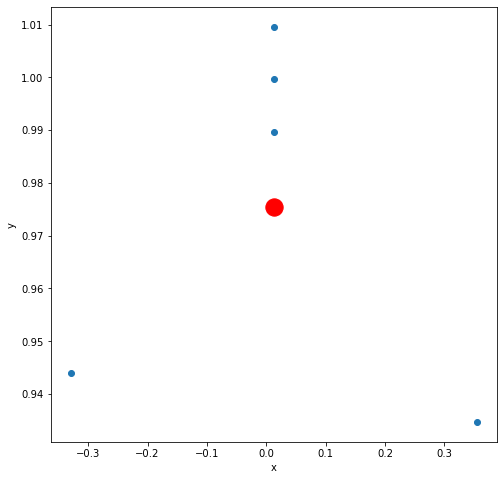

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(sigma_transformed[:,0], sigma_transformed[:,1])
plt.scatter(mean_x, mean_y, color='red', s=300)
plt.xlabel('x')
plt.ylabel('y')
plt.show()